# 1) Importing Requisite Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

# Mounting The Google Drive

In [2]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2) Loading The Data Set

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/diamonds.csv")

# 3) EDA

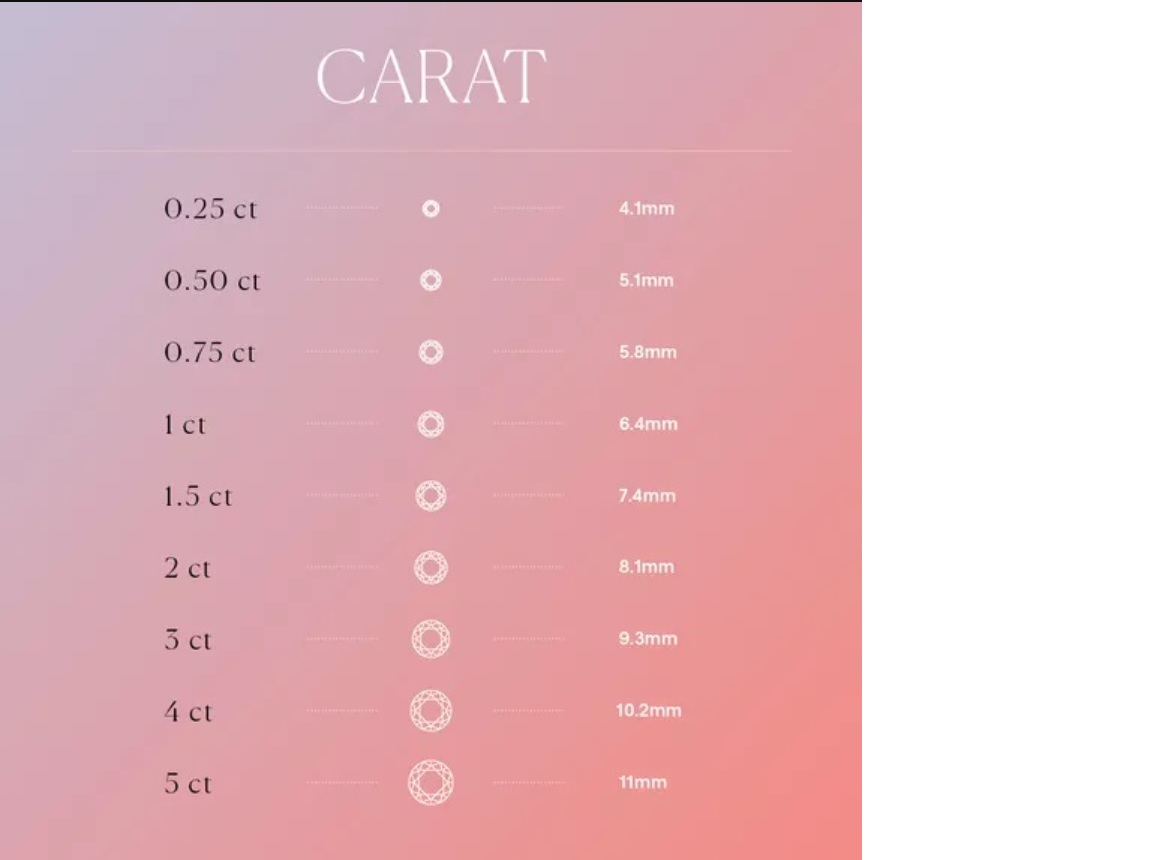

In [4]:
display.Image("/content/drive/MyDrive/Colab Notebooks/Images/carat.jpg")

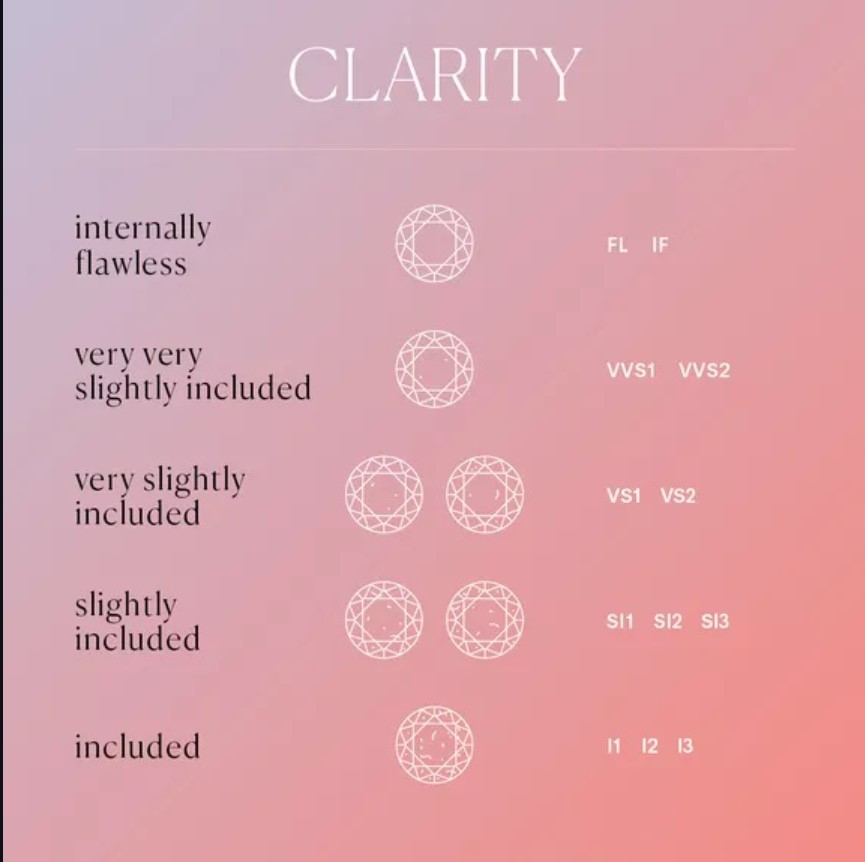

In [5]:
display.Image("/content/drive/MyDrive/Colab Notebooks/Images/clarity.jpg")

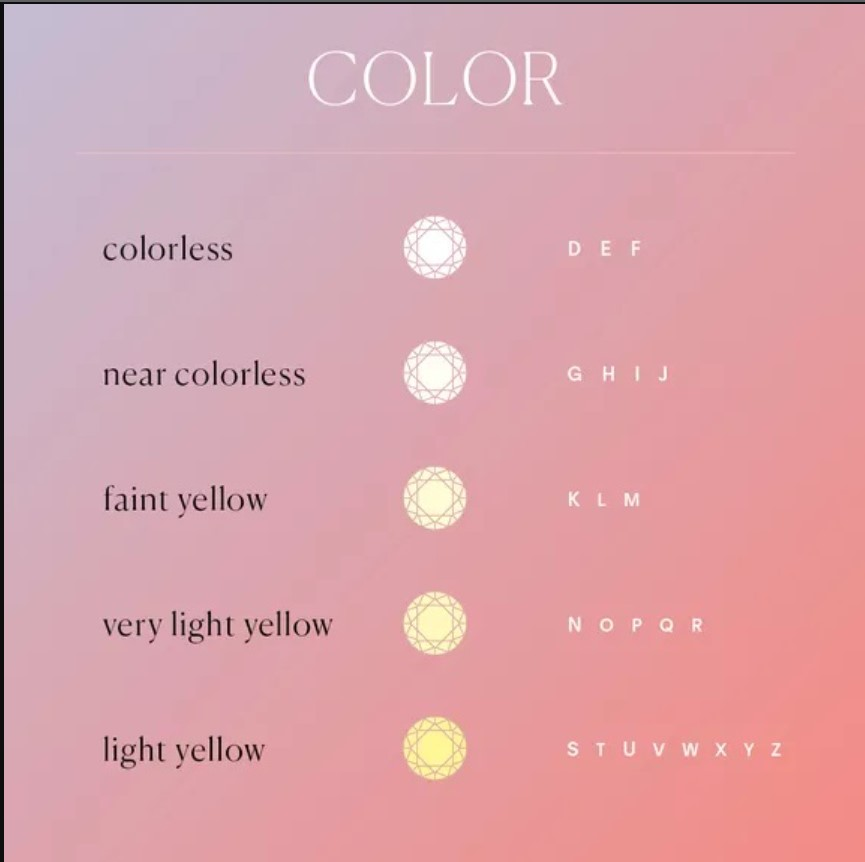

In [6]:
display.Image("/content/drive/MyDrive/Colab Notebooks/Images/color.jpg")

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


price: price in US dollars ($ 326 - $ 18,823)

carat: weight of the diamond (0.2 - 5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0 - 10.74)

y: width in mm (0 - 58.9)

z: depth in mm (0 - 31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

table: width of top of diamond relative to widest point (43 - 95)

In [8]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth_percent", "table": "table_percent"},inplace = True)
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth_percent  53940 non-null  float64
 5   table_percent  53940 non-null  float64
 6   price          53940 non-null  int64  
 7   length         53940 non-null  float64
 8   width          53940 non-null  float64
 9   depth          53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe(include="all")

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


## Observation
1) There are nearly 53940 datapoints with 10 features in columns.<br>
2) The dataset comprises of 3 categorical columns and 7 numerical columns<br>
3) From the describe cell we can say that the most common diamond in the dataset has ideal cut, color G (nearly colorless) and SI1(Slightly Included) clarity<br>
4) The columns x,y and z which represent the length breadth and depth of the diamond have minimum value as 0. These 0 values will be dealt when taking care of outliers.<br>

In [11]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [13]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [14]:
# Checking for Null values
df.isnull().sum()

carat            0
cut              0
color            0
clarity          0
depth_percent    0
table_percent    0
price            0
length           0
width            0
depth            0
dtype: int64

## Observation: 
there are no null values in the given dataframe however we will have to check for outliers.

In [15]:
# First finding the ratio of x/y so as to identify the 0 values as well how it correlates with other features present in the dataframe
df['L/W'] = df['length']/df['width']
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [16]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


## Observation:<br>
Some of the categorical values are not present in the data such as color values from K to Z, clarity values such as I2 and I3, and also poor cut values are not there. 



In [17]:
df.describe(include='all')

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944


## Observation:<br>
We find that length, width, depth and L/W have 0 values as minimum which cannot exist for a diamond. So now lets find how many such values are there.

In [18]:
print(df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0)] )

       carat        cut color clarity  depth_percent  table_percent  price  \
2207    1.00    Premium     G     SI2           59.1           59.0   3142   
2314    1.01    Premium     H      I1           58.1           59.0   3167   
4791    1.10    Premium     G     SI2           63.0           59.0   3696   
5471    1.01    Premium     F     SI2           59.2           58.0   3837   
10167   1.50       Good     G      I1           64.0           61.0   4731   
11182   1.07      Ideal     F     SI2           61.6           56.0   4954   
11963   1.00  Very Good     H     VS2           63.3           53.0   5139   
13601   1.15      Ideal     G     VS2           59.2           56.0   5564   
15951   1.14       Fair     G     VS1           57.5           67.0   6381   
24394   2.18    Premium     H     SI2           59.4           61.0  12631   
24520   1.56      Ideal     G     VS2           62.2           54.0  12800   
26123   2.25    Premium     I     SI1           61.3           5

In [19]:
print('length :',len(df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0)]))

length : 20


## Observation: <br>
There are 20 datapoints which have 0 value in one or the other column. 
Since the number of datapoints with 0 values are very less, compared to the total number of datapoints deleting them will not affect our future models.<br>
L/W column has NaN values which will happen when W=0. So now to delete all these datapoints we first replace the 0 values with NaN and then drop the using pandas drop.

In [20]:
df[['length','width','depth','L/W']]=df[['length','width','depth','L/W']].replace(0,np.NaN)

df.dropna(inplace=True)

In [21]:
df.describe()

,carat,depth_percent,table_percent,price,length,width,depth,L/W
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [22]:
df.shape

(53920, 11)

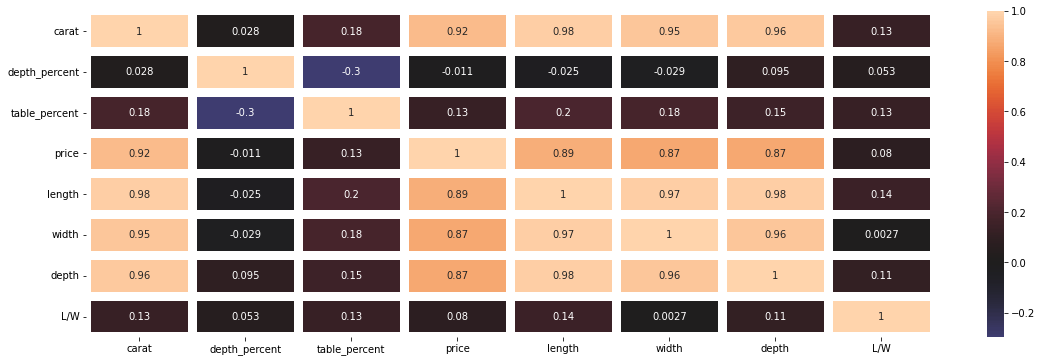

In [23]:
# Finding the correlation between the features of the given data
f, ax = plt.subplots(figsize=(19, 6))
sns.heatmap(df.corr(), annot=True, linewidths=8, center=0,ax=ax)

## Observation:
We find that price has a very high correlation with carat, length, width and depth.

# 4) Data Preprocessing

In [27]:
df['clarity_score']=df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_score'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score,Price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2,5.814131


In [28]:
# Finding the Skewness of Output variable
df['price'].skew()

1.6183486340820077

In [29]:
# Log transforming the output
df['Price_log'] = pd.DataFrame({'price': np.log(df['price'])})
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score,Price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2,5.814131


In [30]:
# Separating Inputs and Outputs
Y=df['Price_log']
X=df[['carat','depth','length','width']]

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [32]:
cols = ['carat','depth','length','width']

In [33]:
# Standardizing the X Train and test
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_transformed = pd.DataFrame(scale.fit_transform(X_train), columns=cols, index=X_train.index)
X_test_transformed = pd.DataFrame(scale.transform(X_test), columns=cols, index=X_test.index)
print(X_train_transformed.head())

          carat     depth    length     width
15208  0.452686  0.641485  0.609560  0.569153
26174  2.762477  2.190628  2.212312  2.186174
47819 -0.564470 -0.481288 -0.393279 -0.353604
52204 -0.183036  0.044568 -0.017214  0.006711
12867  0.685784  0.797821  0.842362  0.788857


In [34]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43136 entries, 15208 to 17682
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   43136 non-null  float64
 1   depth   43136 non-null  float64
 2   length  43136 non-null  float64
 3   width   43136 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [35]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 45798 to 13530
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   10784 non-null  float64
 1   depth   10784 non-null  float64
 2   length  10784 non-null  float64
 3   width   10784 non-null  float64
dtypes: float64(4)
memory usage: 421.2 KB


#5) Model Building

## 5.1) Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

Regression = LinearRegression()
Regression.fit(X_train_transformed, Y_train)

# Making Predictions
y_pred_LR = Regression.predict(X_test_transformed)

In [59]:
from sklearn import metrics
mae_LR = metrics.mean_absolute_error(Y_test, y_pred_LR)
print('Mean Absolute Error: ', mae_LR)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_LR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_LR)))

Mean Absolute Error:  0.20453583277097057
Mean Squared Error:  0.06925995550048748
Root Mean Squared Error:  0.26317286239368887


## 5.2) KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor

KNNreg = KNeighborsRegressor()
KNNreg.fit(X_train_transformed, Y_train)

# Making Predictions
y_pred_KNN = KNNreg.predict(X_test_transformed)

In [61]:
# Evaluation
mae_KNN = metrics.mean_absolute_error(Y_test, y_pred_KNN)
print('Mean Absolute Error: ', mae_KNN)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_KNN)))

Mean Absolute Error:  0.19744724036986264
Mean Squared Error:  0.06465205559488577
Root Mean Squared Error:  0.25426768492060836


## 5.3) Decision Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

DTreg = DecisionTreeRegressor()
DTreg.fit(X_train_transformed, Y_train)

# Making Predictions
y_pred_DT = DTreg.predict(X_test_transformed)

In [62]:
# Evaluation
mae_DT = metrics.mean_absolute_error(Y_test, y_pred_DT)
print('Mean Absolute Error: ', mae_DT)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_DT))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_DT)))

Mean Absolute Error:  0.2486249514060236
Mean Squared Error:  0.10531043246316661
Root Mean Squared Error:  0.3245156890863162


## 5.4) Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

RFreg = RandomForestRegressor()
RFreg.fit(X_train_transformed, Y_train)

# Making Predictions
y_pred_RF = DTreg.predict(X_test_transformed)

In [63]:
# Evaluation
mae_RF = metrics.mean_absolute_error(Y_test, y_pred_RF)
print('Mean Absolute Error: ', mae_RF)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_RF))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_RF)))

Mean Absolute Error:  0.2486249514060236
Mean Squared Error:  0.10531043246316661
Root Mean Squared Error:  0.3245156890863162


## 5.5) Support Vector Regressor

In [50]:
from sklearn.svm import SVR
svrReg = SVR()
svrReg.fit(X_train_transformed,Y_train)
y_pred_SVR = svrReg.predict(X_test_transformed)

In [64]:
# Evaluation
mae_SVR = metrics.mean_absolute_error(Y_test, y_pred_LR)
print('Mean Absolute Error: ', mae_SVR)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_SVR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_SVR)))

Mean Absolute Error:  0.20453583277097057
Mean Squared Error:  0.05857969831963757
Root Mean Squared Error:  0.24203243237144392


# 5.6) GBDT Regressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_reg = GradientBoostingRegressor()
GBDT_reg.fit(X_train_transformed,Y_train)
y_pred_GBDT = GBDT_reg.predict(X_test_transformed)

In [65]:
# Evaluation
mae_GBDT = metrics.mean_absolute_error(Y_test, y_pred_GBDT)
print('Mean Absolute Error: ', mae_GBDT)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred_GBDT))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_GBDT)))

Mean Absolute Error:  0.19108000447262902
Mean Squared Error:  0.05888443911017386
Root Mean Squared Error:  0.24266116110777566


# 6) Evaluation And Comparision

In [66]:
evaluation = pd.DataFrame({'Algorithms':['Linear Regression','KNN','Decision Tree','Random Forest','SVR','GBDT Regressor',] ,
                           'Predicted': [mae_LR,mae_KNN,mae_DT,mae_RF,mae_SVR,mae_GBDT]})
evaluation

,Algorithms,Predicted
0,Linear Regression,0.204536
1,KNN,0.197447
2,Decision Tree,0.248625
3,Random Forest,0.248625
4,SVR,0.204536
5,GBDT Regressor,0.191080


# Conclusion:
GBDT is the best